<a href="https://colab.research.google.com/github/RoxySJ/Desafio-cyberlabs-VC/blob/main/DesafioCyberlabVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from resources.plotcm import plot_confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [159]:
#Baixando dataset de treino da MNIST e transformando-o em um tensor
train_set = torchvision.datasets.MNIST(root='./data', train = True, download = True, transform = transforms.ToTensor())
# Selecionando apenas as classes 0 e 5
idx = (train_set.targets==0) | (train_set.targets==5) 
train_set.targets = train_set.targets[idx]
train_set.data = train_set.data[idx]

In [160]:
#tamanho do dataset de treino
len(train_set)

11344

In [162]:
# Mostrando os rótulos 
train_set.targets

tensor([5, 0, 5,  ..., 0, 5, 5])

In [163]:
# Arquitetura da rede
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        
        self.fc1 = nn.Linear(in_features= 32*3*3, out_features=96)
        self.out = nn.Linear(in_features=96, out_features=2)

# Forward pass
    def forward(self, t):
        # (1) input layer
        t = t
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (4) hidden conv layer
        t = self.conv3(t)
        #print(t.size())
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = t.reshape(-1, 32 * 3 * 3)
        t = self.fc1(t)
       
        # (6) output layer
        t = self.out(t)
       # print(t.size())
        #t = F.softmax(t, dim=1)
        return t;

In [164]:
#exibindo uma rede
networkTeste = Network()   
print(networkTeste)

Network(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=288, out_features=96, bias=True)
  (out): Linear(in_features=96, out_features=2, bias=True)
)


In [165]:
#função que retorna o número de predições corretas
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [166]:
#criando uma rede para o treinamento
network = Network()
optimizer = optim.Adam(network.parameters(), lr=0.001)
train_loader = torch.utils.data.DataLoader(
    train_set
    ,batch_size=16
    ,shuffle=True
)

In [167]:
#treinamento
for epoch in range(20):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # para cada batch
        images, labels = batch 
        #Aqui eu só transformo os labels de 0 ou 5 para 0 ou 1, respectivamente, para que eles fiquem compatíveis com a função cross_entropy
        labels = labels/5
        labels = labels.long()
        preds = network(images) # Passa o batch
        loss = F.cross_entropy(preds, labels) # Calcula o erro


        optimizer.zero_grad()
        loss.backward() # Calculata os gradientes
        optimizer.step() # Atualiza os pesos


        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)


    print(
        "epoch", epoch, 
        "total_corretas:", total_correct, 
        "erro:", total_loss
    )

epoch 0 total_corretas: 11172 erro: 37.36629963485757
epoch 1 total_corretas: 11303 erro: 7.183496933417246
epoch 2 total_corretas: 11320 erro: 4.381826120311899
epoch 3 total_corretas: 11333 erro: 2.5083382187293912
epoch 4 total_corretas: 11334 erro: 1.4984110481430473
epoch 5 total_corretas: 11327 erro: 3.0608135929264013
epoch 6 total_corretas: 11335 erro: 1.6921921417868186
epoch 7 total_corretas: 11330 erro: 2.608856463030947
epoch 8 total_corretas: 11344 erro: 0.09191573612444781
epoch 9 total_corretas: 11344 erro: 0.021027492011886473
epoch 10 total_corretas: 11344 erro: 0.009270742666866116
epoch 11 total_corretas: 11344 erro: 0.004809228591465153
epoch 12 total_corretas: 11344 erro: 0.002678191358559623
epoch 13 total_corretas: 11344 erro: 0.0016660264044885409
epoch 14 total_corretas: 11344 erro: 0.0011074970447229049
epoch 15 total_corretas: 11344 erro: 0.0007338614120384612
epoch 16 total_corretas: 11344 erro: 0.00048444570503880513
epoch 17 total_corretas: 11344 erro: 0.0

In [168]:
#Baixando dataset de teste da MNIST e transformando-o em um tensor
test_set = torchvision.datasets.MNIST(root='./data', train = False, download = True, transform = transforms.ToTensor())
# Selecionando apenas as classes 0 e 5
idx = (test_set.targets==0) | (test_set.targets==5) 
test_set.targets = test_set.targets[idx]
test_set.data = test_set.data[idx]

In [169]:
#tamanho do dataset de teste
len(test_set)

1872

In [170]:
#pegando uma imagem do meu dataset de teste
sample = next(iter(test_set)) 
image, label = sample 
image.shape



torch.Size([1, 28, 28])

tensor(0)

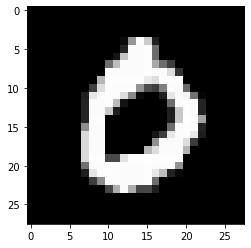

In [171]:
#mostrando imagem e label real dela 
image = sample[0]
label = sample[1]
plt.imshow(image.squeeze(), cmap="gray")
torch.tensor(label)

In [172]:
#gerando a previsão da rede para essa imagem
pred = network(image.unsqueeze(0)) # image shape needs to be (batch_size × in_channels × H × W)

In [173]:
#previsão da rede para cada classe
pred

tensor([[ 22.5723, -20.5370]], grad_fn=<AddmmBackward>)

In [174]:
#previsão de label feita pela rede
pred.argmax(dim=1)

tensor([0])

In [175]:
#previsão em probabilidade de cada classe
F.softmax(pred, dim=1)

tensor([[1.0000e+00, 1.8962e-19]], grad_fn=<SoftmaxBackward>)

In [176]:
#verificando se a soma de probabilidades dá 1
F.softmax(pred, dim=1).sum()

tensor(1., grad_fn=<SumBackward0>)

In [177]:
#função que calcula previsões para todo o dataset de teste

@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [178]:
 #criando um tensor com todas as previsões
 prediction_loader = torch.utils.data.DataLoader(test_set, batch_size=100)
 test_preds = get_all_preds(network, prediction_loader)

In [179]:
# Aqui eu só transformo os labels de 0 ou 5 para 0 ou 1, respectivamente, para que eles fiquem compatíveis com os labels preditos
test_set.targets = test_set.targets/5
test_set.targets = test_set.targets.long()
test_set.targets

tensor([0, 1, 0,  ..., 1, 0, 1])

In [180]:
#calculando o número de previsões corretas
preds_correct = get_num_correct(test_preds, test_set.targets)
print('total corretas:', preds_correct)
print('acuracia:', preds_correct / len(test_set))

total corretas: 1869
acuracia: 0.9983974358974359


In [181]:
#função que plota a matriz
#o import não estava funcionando
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [182]:
#gerando matriz de confusão
cm = confusion_matrix(test_set.targets, test_preds.argmax(dim=1))

Confusion matrix, without normalization
[[979   1]
 [  2 890]]


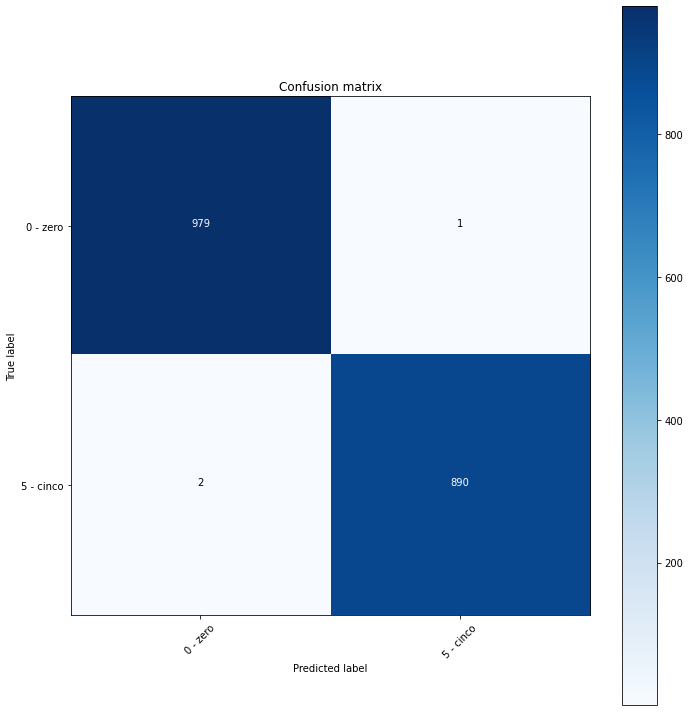

In [183]:
#plotando matriz de confusão
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, ['0 - zero','5 - cinco'])